In [24]:
import os
from dotenv import load_dotenv,find_dotenv
from typing_extensions import TypedDict
from langgraph.graph import START,StateGraph,END,add_messages
from langchain_community.vectorstores import FAISS
from langchain_groq.chat_models import ChatGroq
from langchain_core.documents import Document
from langchain_community.tools import Tool,tavily_search
from IPython.display import Image,display

In [12]:
llm = ChatGroq(model="qwen-qwq-32b")
llm.invoke("capital of india")

AIMessage(content="\n<think>\nOkay, the user is asking for the capital of India. Let me start by recalling what I know. India's capital has been New Delhi for a long time. But wait, I should make sure there haven't been any recent changes. I remember that before 1911, the capital was Kolkata, then it was shifted to Delhi. But I need to be precise here.\n\nWait, the user might be looking for the current capital. So yes, it's definitely New Delhi. But let me confirm the exact name. Sometimes people confuse Delhi and New Delhi. New Delhi is a part of the larger Delhi metropolitan area. The British moved the capital from Kolkata to Delhi in 1911, and New Delhi was officially inaugurated as the capital in 1931. \n\nAlso, I should mention that Delhi is a union territory, and the national government is based there. Are there any other capitals in India? Like state capitals, but the question is about the country's capital. No, the answer is straightforward. New Delhi is the capital. I should a

In [21]:
class State(TypedDict):
    message:str

In [38]:
def greeting_node(state:State) -> State:
    """
        Add Greeting Message
    """
    state["message"] = f"hey :: {state['message']}"
    return state


In [8]:
def add(a:int,b:int) -> int:
    """
    add a and b
    a: first argument
    b: second argument

    """
    return a+b

In [39]:
graph_builder = StateGraph(State)

In [40]:
graph_builder.add_node("greet",greeting_node)
graph_builder.set_entry_point("greet")

In [41]:
graph = graph_builder.compile()

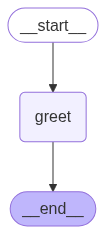

In [34]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [42]:
graph.invoke({"message":"hello"})

{'message': 'hey :: hello'}

In [43]:
class AgentState(TypedDict):
    name:str

In [45]:
def greet_msg(state:AgentState) -> AgentState:
    """
    simple message to a given name
    """
    state['name'] = f"{state['name']}, you are doing a great job !"
    return state

In [46]:
builder = StateGraph(AgentState)

In [47]:
builder.add_node("greeter",greet_msg)
builder.set_entry_point("greeter")

In [48]:
graph = builder.compile()

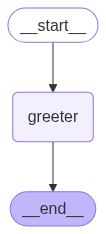

In [55]:
Image(graph.get_graph().draw_mermaid_png())

In [49]:
graph.invoke({"name":"BOB"})

{'name': 'BOB, you are doing a great job !'}